# Projet Traitement du Signal

In [2]:
import numpy as np
from scipy import integrate
from math import *
import matplotlib.pyplot as plt
import scipy.signal as sig

f_c = 1000
B = 10
N = 1000
dt = 0.1

In [3]:
def f1(t,theta):
    return exp(t*cos(theta))

def I(t):
    '''fonction de bessel modifiée d'ordre 0'''
    res1,_=integrate.quad(f1,0,pi,args=(t))
    return (1/pi)*res1

def signal(t,alpha=6):
    '''on choisit une fenètre de type Kaiser'''
    if np.abs(t)<=B/2:
        return I(pi*alpha*sqrt(1-(2*t/B)**2))/I(pi*alpha)
    else:
        return 0
    
T = np.linspace(-6, 6, N)

x = np.array([signal(t) for t in T])
#x = np.cos(2*np.pi*T)
x_m = x*np.cos(2*np.pi*f_c*T)

In [5]:
x_md = np.cos(2*np.pi*f_c*T)*x_m

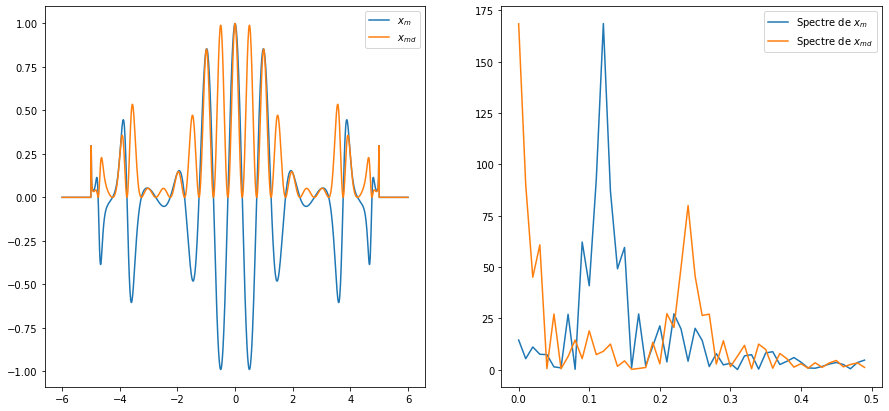

In [6]:
#Affichage du signal
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
plt.plot(T, x_m, label='$x_m$')
plt.plot(T, x_md, label='$x_{md}$')
plt.legend()

#Affichage du spectre
freqs = np.linspace(0,2*np.pi*(N-1)/N/dt,N)/2/np.pi
plt.subplot(1,2,2)
#plt.plot(freqs[:N//20], np.abs(np.fft.fft(x)[:N//20]), label='Spectre de $x$')
plt.plot(freqs[:N//20], np.abs(np.fft.fft(x_m)[:N//20]), label='Spectre de $x_m$')
plt.plot(freqs[:N//20], np.abs(np.fft.fft(x_md)[:N//20]), label='Spectre de $x_{md}$')
plt.legend() ;

In [7]:
def Filtre_PB(y, dt, N_filter, fc, plot = True):
    num_low, den_low = sig.butter(N_filter, fc, btype='lowpass', fs=1/dt)   
    y_low = sig.filtfilt(num_low, den_low, y)
    return y_low

In [8]:
x_mdf = Filtre_PB(x_md, 0.1, 2, 0.25)

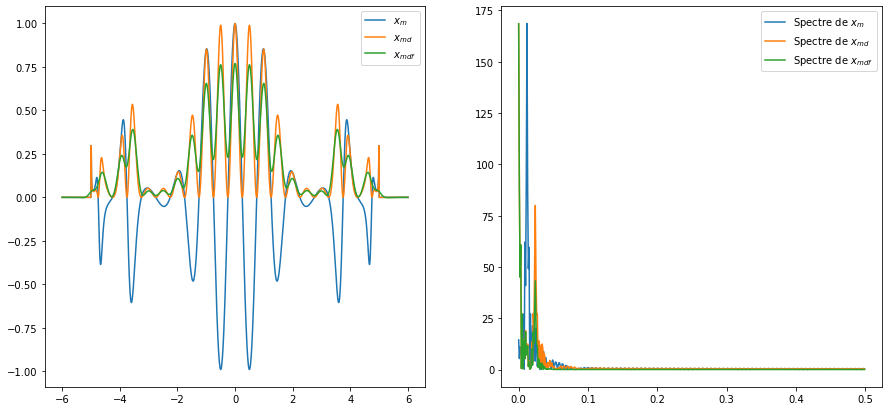

In [10]:
#Affichage du signal
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
plt.plot(T, x_m, label='$x_m$')
plt.plot(T, x_md, label='$x_{md}$')
plt.plot(T, x_mdf, label='$x_{mdf}$')
plt.legend()

#Affichage du spectre
freqs = np.arange(1000)/1000
plt.subplot(1,2,2)
plt.plot(freqs[:N//2], np.abs(np.fft.fft(x_m)[:N//2]), label='Spectre de $x_m$')
plt.plot(freqs[:N//2], np.abs(np.fft.fft(x_md)[:N//2]), label='Spectre de $x_{md}$')
plt.plot(freqs[:N//2], np.abs(np.fft.fft(x_mdf)[:N//2]), label='Spectre de $x_{mdf}$')
plt.legend();